#1. Métricas de avaliação de modelos de classificação
Métricas de avaliação são essenciais para medir o desempenho de modelos de classificação. As principais métricas utilizadas incluem **Accuracy, Precision, Recall e F1-score**, cada uma adequada a diferentes cenários. Considerando True Positives (TP), True Negatives (TN), False Positives (FP) e False Negatives (FN) dados pela matriz de confusão:

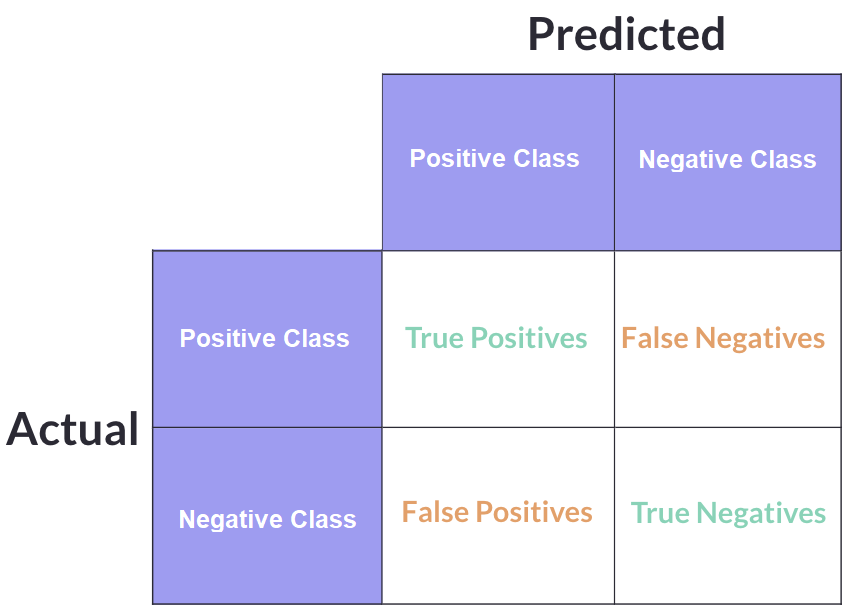

## Métricas
### **Accuracy**
Mede a proporção de previsões corretas sobre o total de exemplos avaliados. Em síntese, ela mede a proporção de classificações corretas. Sua fórmula é dada por:
$$
\frac{TP + TN}{TP + TN + FP + FN}
$$

> A acurácia é apropriadamente empregada quando as classes estão balanceadas. Já em problemas com classes desbalanceadas, essa métrica pode ser enganosa pois pode parecer alta mesmo quando o modelo erra frequentemente a classe minoritária.

### **Precision**
Mede a proporção de exemplos classificados como positivos que realmente pertencem à classe positiva, e é dada por:
$$
\frac{TP}{TP + FP}
$$

> A precisão é importante em cenários onde o custo de um **falso positivo** é alto, como em diagnósticos médicos ou detecção de fraudes.

### **Recall**
Também chamada de sensibilidade (ou sensitivity) é uma métrica que mede a proporção de exemplos positivos que foram corretamente identificados, ou a capacidade do modelo de encontrar todos os exemplos positivos. Essa taxa é encontrada com a função:
$$
\frac{TP}{TP + FN}
$$

> E é importante quando o custo de um **falso negativo** é alto, como no diagnóstico de doenças graves ou em sistemas de segurança.

### **F1-score**
É a média harmônica entre precisão e recall, combinando essas duas métricas em uma única métrica equilibrada, dada por:
$$
2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

> É uma métrica bastante útil quando as classes estão desbalanceadas e é necessário equilibrar a importância entre precisão e recall.

## Resumo
Em síntese, as métricas **recall, precision e accuracy** podem ser entendidas com a figura abaixo.

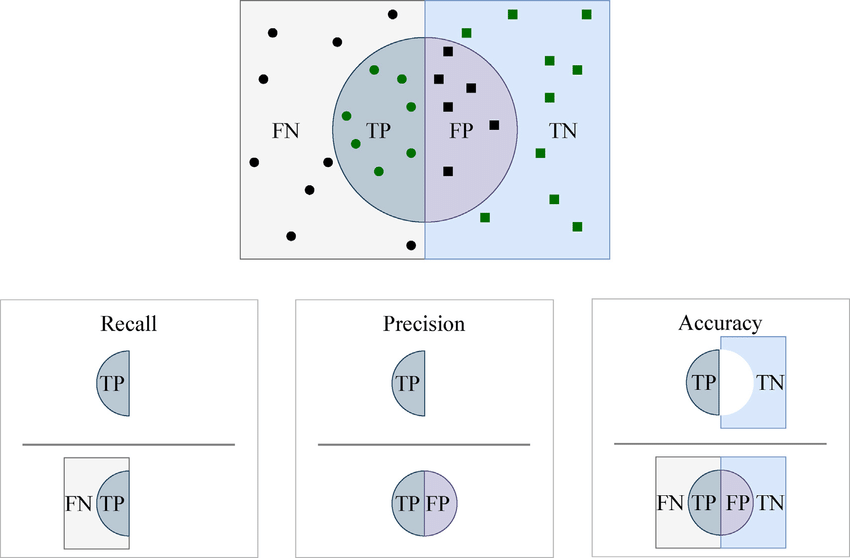

Sendo que recall é a taxa de verdadeiros positivos previstos dentre todos os verdadeiros positivos reais; precision é a taxa de verdadeiros positivos dentre todos que foram preditos como positivos; e a acurácia é a taxa de acertos geral tanto da classe positiva quanto da classe negativa.

---
---
# 2. Explicação das figuras

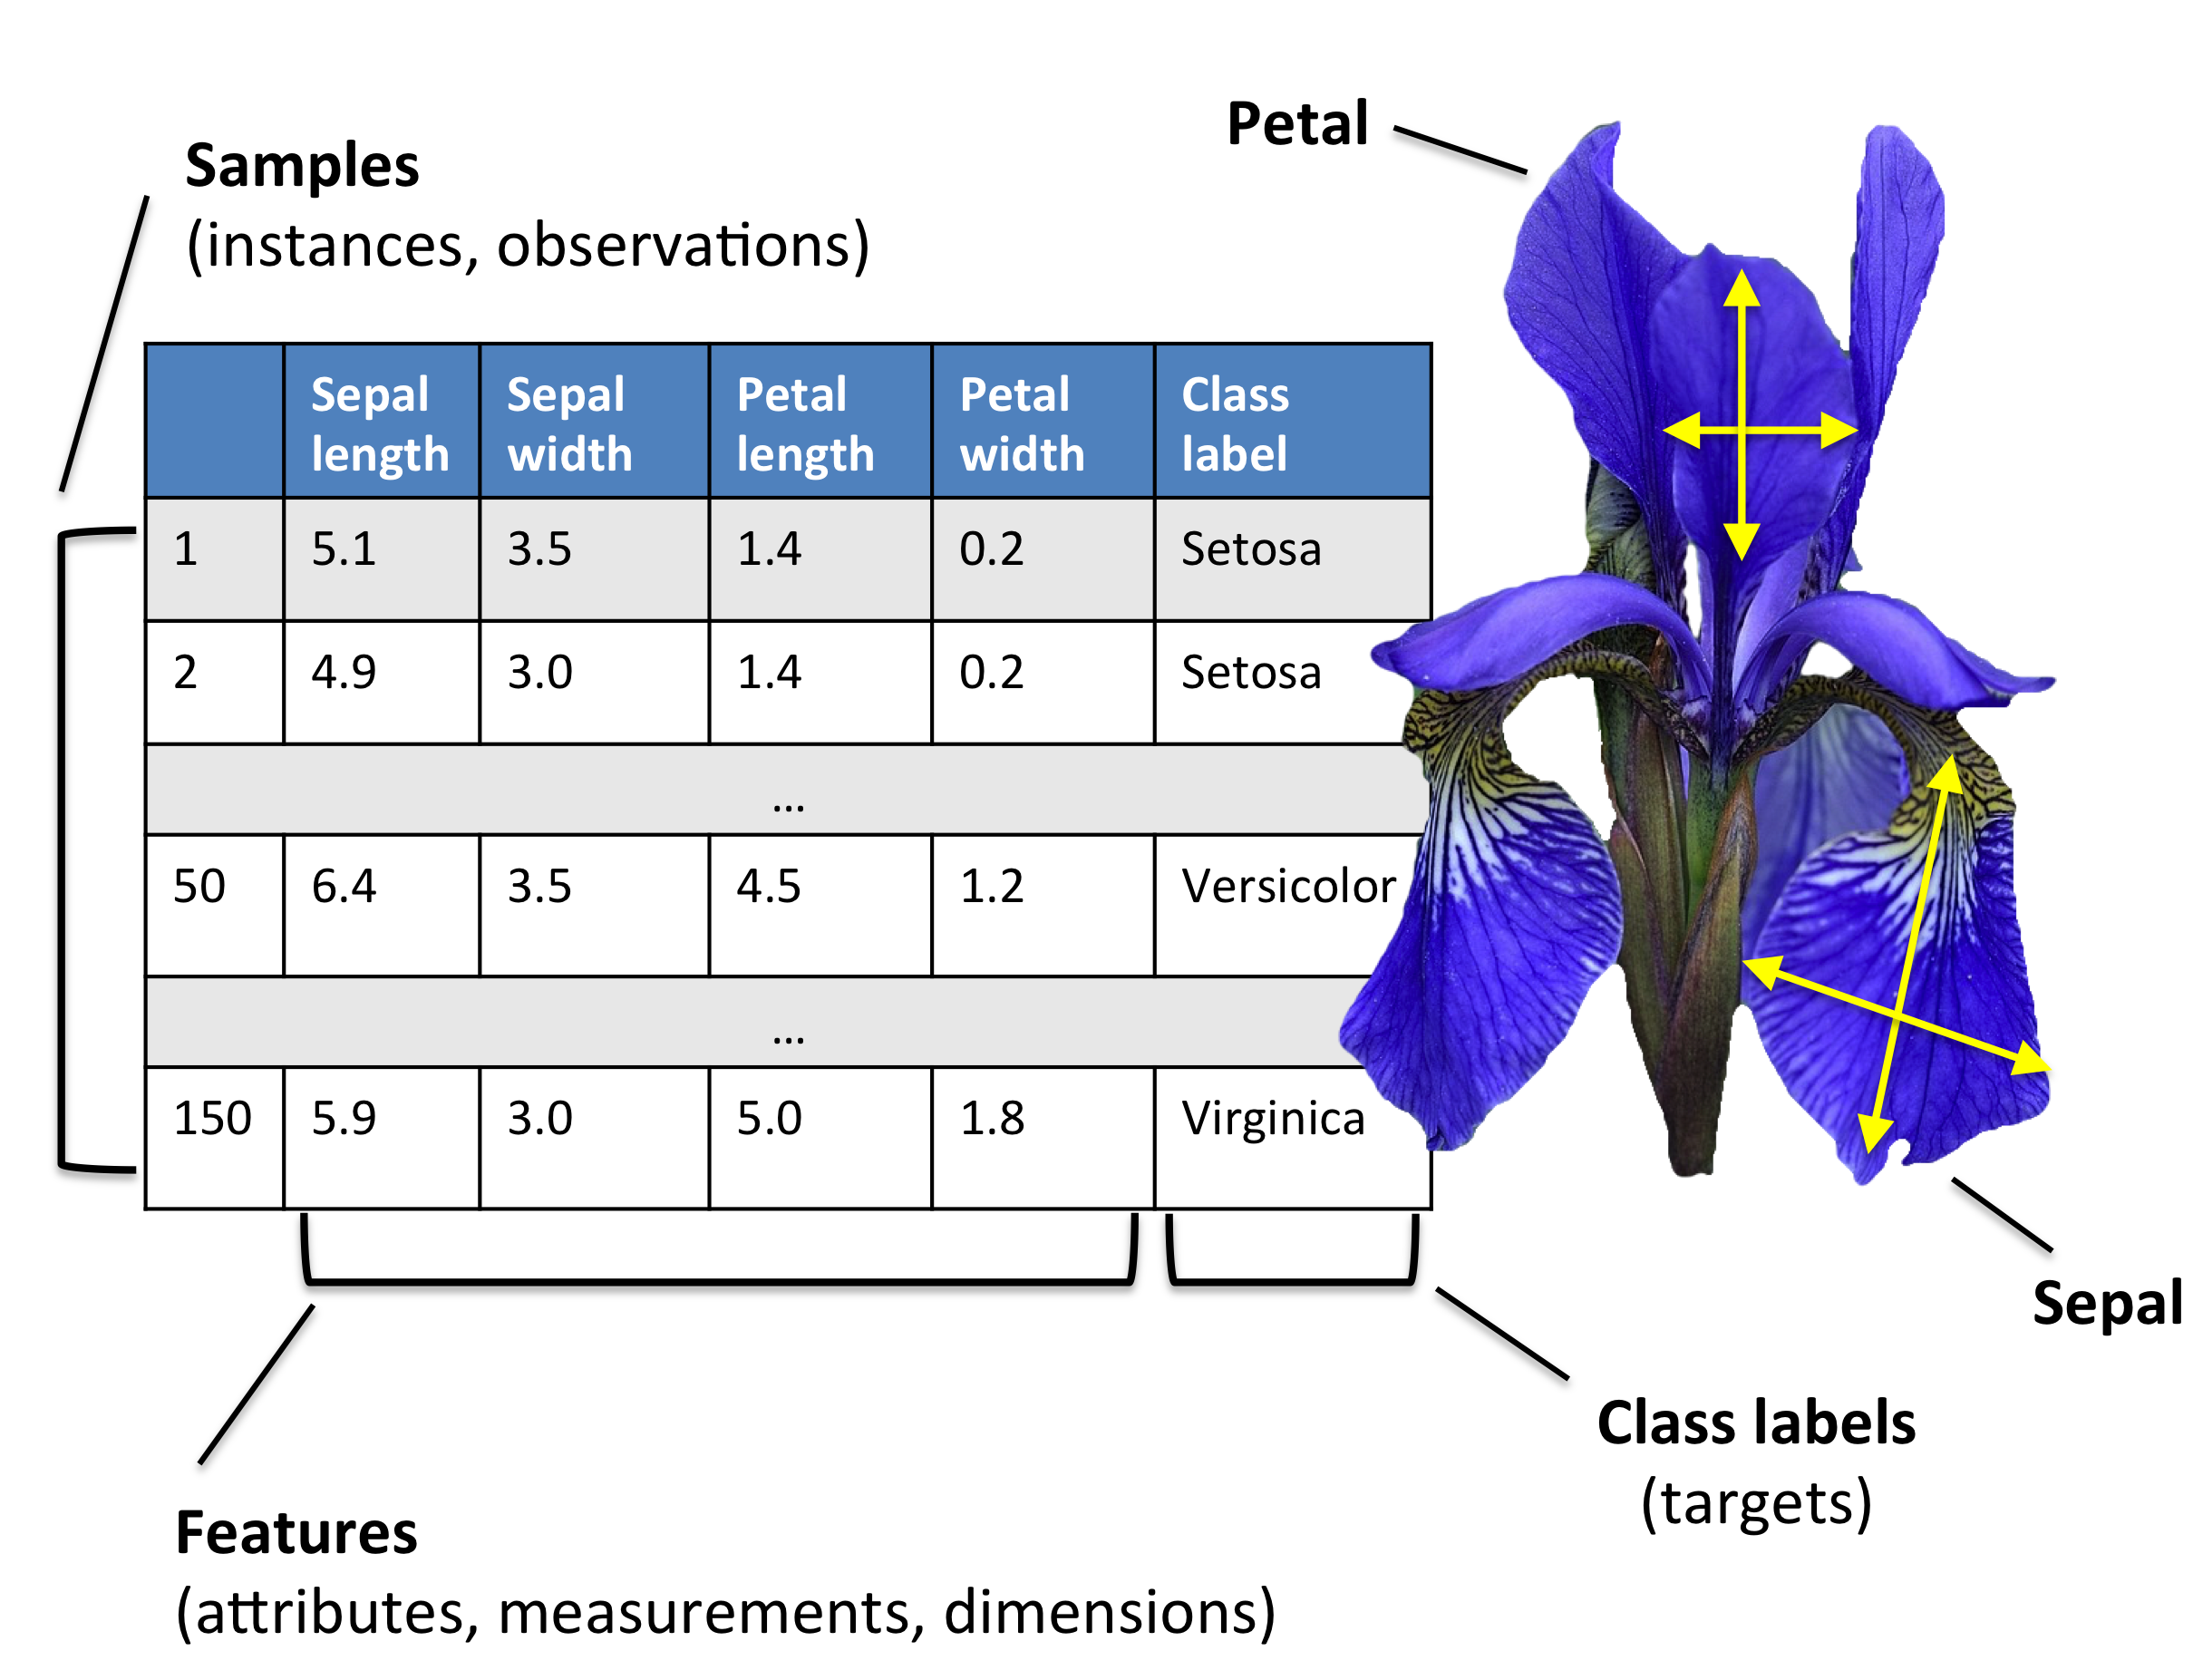

A figura acima representa como os dados das amostras (flor íris) estão armazenados. A imagem da flor apresenta uma amostra e explica as caraterísticas que deram origem às features, neste caso a sépala e a pétala. Na tabela estão os dados de comprimento e largura (colunas) dessas duas características de cada amostra (linhas). A última coluna diz qual tipo de íris é cada amostra, podendo ser virgínica, versicolor ou setosa. Além disso, há a primeira coluna que é apenas o índice das amostras, podendo ser usado como identificador das amostras - o que não será usado no aprendizado de máquina.

Como estes dados estão rotulados, ou seja, sabemos que as amostras pertencem à determinados grupos (classes), este conjunto de dados pode ser usado para uma tarefa de aprendizado supervisionado, onde um algoritmo de inteligência artificial aprenderá como as características das amostras se relaciona com as suas respectivas classes.

image.png

A imagem acima demonstra o procedimento padrão empregado em projetos de ciência de dados. Seguindo a figura, podemos dividir em 4 etapas:
1. Processamento, onde é feito:

  * Extração de recursos, ou produção/levantamento de características.
  * Escalonamento de dados, pois alguns modelos de IA são sensíveis à variação dos valores dos dados. Além disso, o escalonamento de dados facilita a comparação entre features e contribui para que o processo de ajuste dos pesos em redes neurais seja mais rápido.
  * Seleção de features, uma vez que nem todas as características podem ser relevantes no aprendizado de máquina.
  * Redução de dimensionalidade, onde as features podem ser selecionadas (etapa anterior) ou combinadas para formar outras features que represente as características redundantes em uma quantidade menor de colunas.
  * Amostragem, divisão dos dados para realizar o treinamento na fase de aprendizado e teste para avaliar o desempenho na fase de avaliação.

2. Learning, onde será(ão) empregado(s) algoritmo(s) de aprendizado de máquina ou aprendizado profundo.

3. Evaluation, onde serão feitas avaliações de performance do(s) modelo(s) de inteligência artificial para classificar ou prever valores com maior acertabilidade com base nos dados usados na fase de aprendizado.

4. Previsão, onde o modelo treinado e validado é usado para prever valores ou discriminar amostras entre as classes que foi treinado.

---
---
# 3. Explicação da implementação de um algoritmo de perceptron learning

## An object-oriented perceptron API

In [ ]:
import numpy as np

# nesta célula é criada a classe perceptron que é um classificador binário que faz a separação de dados em duas classes
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1): # nesta função é feito o processo de inicialização dos parâmetros. Para isso, é recebido como parâmetros eta, n_iter e random_state, que são, respectivamente, a taxa de aprendizado, o número de iterações e a semente do gerador de números aleatórios. Estes parâmetros são importantes para o treinamento do perceptron.
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state) # a função fit é usada para treinar o modelo. Nesta linha, é feito o processo de inicialização dos pesos do modelo com uma distribuição normal, com média 0 e desvio padrão 0.01, utilizando a semente definida.
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # aqui está sendo feito o armazenamento dos pesos iniciais aleatórios para o modelo. O vetor de pesos tem tamanho igual ao número de características (features) de X, mais um para o bias (peso adicional).
        self.errors_ = []

        for _ in range(self.n_iter): # este laço for é apenas para iterar sobre o número de passagens (épocas) sobre os dados e atualizar os pesos em cada iteração.
            errors = 0
            for xi, target in zip(X, y): # para cada iteração, é feito o cálculo da atualização dos pesos para cada exemplo xi e seu respectivo alvo (target).
                update = self.eta * (target - self.predict(xi)) # A atualização do peso é feita pela diferença entre o alvo e a previsão, multiplicado pela taxa de aprendizado (eta).
                self.w_[1:] += update * xi # os pesos são atualizados multiplicando o valor da atualização pelo valor das características de cada exemplo.
                self.w_[0] += update # o bias (peso de 0) é atualizado de acordo com a atualização calculada.
                errors += int(update != 0.0) # nesta linha, é adicionado 1 à contagem de erros se a atualização do peso for diferente de zero, indicando que houve uma classificação incorreta.
            self.errors_.append(errors)
        return self

    def net_input(self, X): # nesta função é feito o cálculo da soma ponderada das entradas, ou seja, o produto interno entre as entradas e os pesos, mais o viés.
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X): # nesta função é feita a predição com base no valor da entrada e nos pesos calculados. Se o valor da soma ponderada (net input) for maior ou igual a 0, a classe prevista será 1; caso contrário, será -1.
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [ ]:
# nesta célula é feito o cálculo do ângulo entre dois vetores no espaço euclidiano.
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1 # o vetor criado é uma versão escalada de v1, onde cada componente de v1 é multiplicado por 0.5.
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))) # e aqui é feito o cálculo do ângulo entre os vetores v1 e v2, usando a fórmula do cosseno do ângulo, que envolve o produto escalar dos vetores e seus módulos (normas).


0.0

<br>
<br>

## Training a perceptron model on the Iris dataset

...

Nas próximas 3 células, são apresentadas formas de leitura do dataset Iris, que podem ser por URL ou por caminho local do arquivo.

### Reading-in the Iris data

In [ ]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

<hr>

### Note:


You can find a copy of the Iris dataset (and all other datasets used in this book) in the code bundle of this book, which you can use if you are working offline or the UCI server at https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data is temporarily unavailable. For instance, to load the Iris dataset from a local directory, you can replace the line

    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

by

    df = pd.read_csv('your/local/path/to/iris.data', header=None)


In [ ]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8') # se tivesse o dataset iris
df.tail()

<hr>

<br>
<br>

### Plotting the Iris data

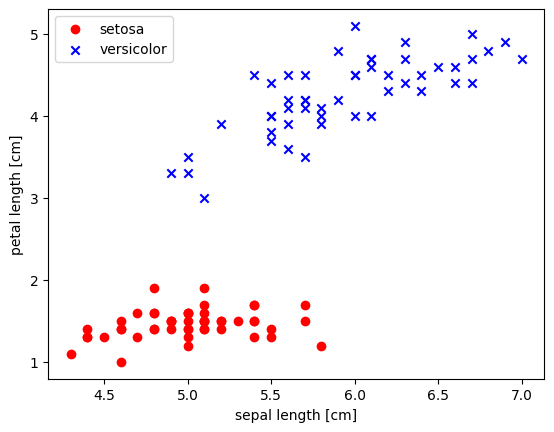

In [ ]:
# Nesta célula é plotado o gráfico de dispersão (scatter plot) que mostra a relação entre as medidas das sépalas e pétalas das flores das duas classes.
#%matplotlib inline # usa-se o matplotlib inline quando se deseja exibir gráficos diretamente no notebook Jupyter, sem a necessidade de abrir uma janela externa.
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# os dados plotados referem-se a duas espécies de flores do dataset Iris: 'setosa' e 'versicolor'
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()


<br>
<br>

### Training the perceptron model

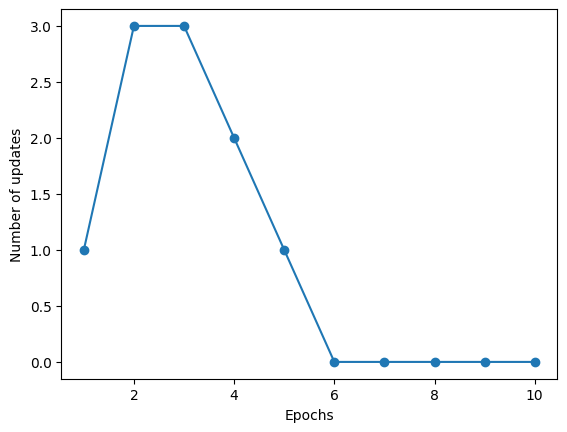

In [ ]:
# nesta célula a classe perceptron é instanciada. O objeto perceptron, que é um modelo de classificação, é treinado com os dados de entrada X (características das flores) e y (rótulos das classes).
# Ao final do treino, os erros de classificação (número de atualizações) são exibidos em um gráfico de linha que mostra o número de erros (atualizações) em relação às épocas de treino (iterações).
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()


<br>
<br>

### A function for plotting decision regions

In [ ]:
# nesta célula é criada a função que toma os dados de entrada (X), os rótulos de classe (y) e o classificador como parâmetros para plotar as regiões de decisão do classificador, onde "resolution" é a resolução da grade utilizada para desenhar as fronteiras de decisão.
from matplotlib.colors import ListedColormap # esta importação é para permitir a criação de mapas de cores personalizados, usados para colorir as regiões de decisão no gráfico.

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    # estas variáveis são listas de marcadores e cores que serão usadas para diferenciar as classes no gráfico.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # cria-se um mapa de cores com base no número de classes únicas em y.

    # plot the decision surface
    # para plotar as regiões de decisão, é preciso fazer uma grade sobre o espaço de características (X),
    # por isso as variáveis x1 e x2 são setadas com os valores mínimos e máximos das características em X.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # xx1 e xx2 são matrizes que formam uma grade de pontos ao longo do espaço 2D das características.
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # a variável Z armazena as predições do classificador para cada ponto da grade.
    Z = Z.reshape(xx1.shape) # para que a variável Z seja compatível com a grade de pontos (xx1, xx2), ela precisa ter o mesmo formato da grade.
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # nesta linha é feito o preenchimento da área com as regiões de decisão, colorindo com base nas predições do classificador.
    plt.xlim(xx1.min(), xx1.max()) # define os limites do eixo x para a grade.
    plt.ylim(xx2.min(), xx2.max()) # define os limites do eixo y para a grade.

    # plot class examples
    for idx, cl in enumerate(np.unique(y)): # neste laço for, é plotado cada ponto de classe presente nos dados de entrada.
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx], # a cor de cada classe é definida pelo índice correspondente.
                    marker=markers[idx], # o marcador de cada classe é definido pelo índice correspondente.
                    label=cl,
                    edgecolor='black')


<ipython-input-19-f594a8100145>:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


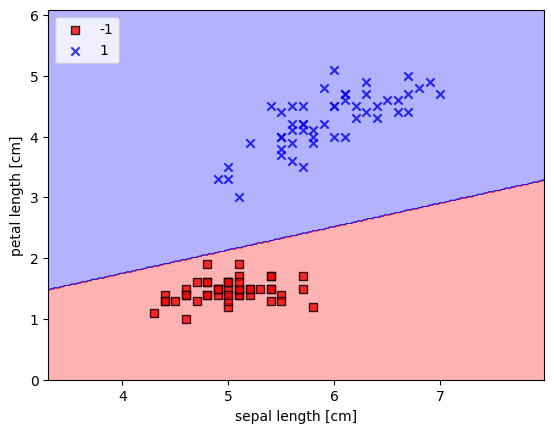

In [ ]:
# nesta célula, a função explicitada anteriormente é usada para plotar as regiões de decisão do classificador perceptron (ppn) com base nas características 'sepal length' e 'petal length'.
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left') # a legenda é posicionada no canto superior esquerdo para identificar as classes.

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

---
---
# 4. Implementando um algoritmo de perceptron learning

https://colab.research.google.com/drive/1ONSEFePhUsXewX4ccHEvTj0O4AA7aEcO?usp=sharing

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

## Geração e plot de dados sintéticos

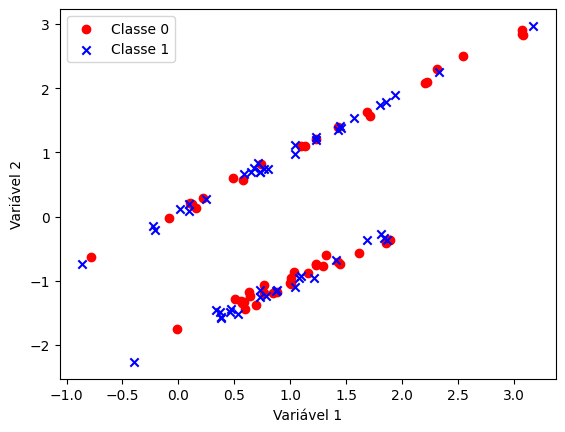

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
y_ = df.iloc[0:100, 0].values
y_ = np.where(y == 0, -1, 1)

X = df.iloc[:, [0, 1]].values

plt.scatter(X[:50, 0], X[:50, 1],
             color='red', marker='o', label='Classe 0')
plt.scatter(X[50:100, 0], X[50:100, 1],
             color='blue', marker='x', label='Classe 1')
plt.xlabel('Variável 1')
plt.ylabel('Variável 2')
plt.legend(loc='upper left')
plt.show()

## Treinamento do modelo perceptron

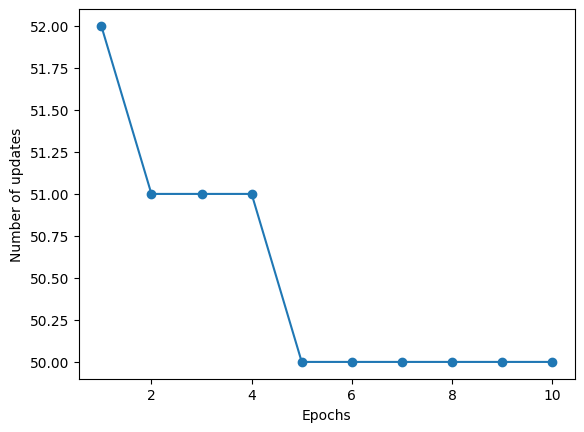

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

## Função para plotar regiões de decisão

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-7-2dba8886e370>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


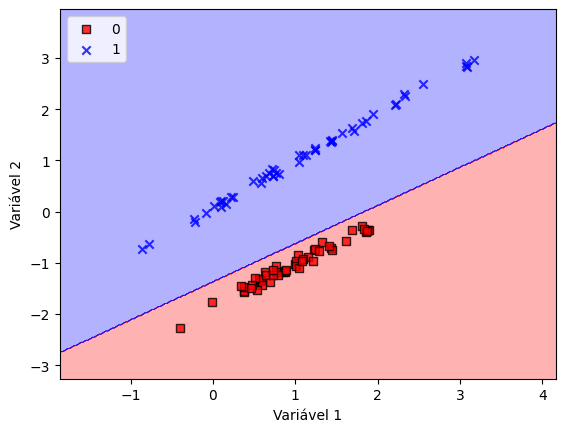

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Variável 1')
plt.ylabel('Variável 2')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()